In [1]:
import numpy as np
import pandas as pd



In [2]:
df = pd.read_csv(r'./data/Linux_v2_2.csv')
df.head()

,Date,Time,Hostname,Message,Severity,Process,PID,User,IP,Len
0,2019-06-09,06:06:20,combo,restart.,0,syslogd 1.4.1,NaN,root,127.0.0.1,8
1,2019-06-09,06:06:20,combo,syslogd startup succeeded,0,syslog,NaN,root,127.0.0.1,25
2,2019-06-09,06:06:20,combo,klogd startup succeeded,0,syslog,NaN,root,127.0.0.1,23
3,2019-06-09,06:06:20,combo,"klogd 1.4.1, log source = /proc/kmsg started.",0,kernel,NaN,root,127.0.0.1,45
4,2019-06-09,06:06:20,combo,Linux version 2.6.5-1.358 (bhcompile@bugs.buil...,0,kernel,NaN,root,127.0.0.1,143


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25706 entries, 0 to 25705
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      25706 non-null  object
 1   Time      25706 non-null  object
 2   Hostname  25706 non-null  object
 3   Message   25613 non-null  object
 4   Severity  25706 non-null  int64 
 5   Process   25688 non-null  object
 6   PID       11176 non-null  object
 7   User      25706 non-null  object
 8   IP        25706 non-null  object
 9   Len       25706 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [4]:
df.shape

(25706, 10)

In [5]:
df.isnull().sum()

Date            0
Time            0
Hostname        0
Message        93
Severity        0
Process        18
PID         14530
User            0
IP              0
Len             0
dtype: int64

In [6]:
df.dropna(subset=['Message'], inplace=True)
df.dropna(subset=['Process'], inplace=True)
df['PID'].fillna('0', inplace=True)

In [7]:
df.isnull().sum()

Date        0
Time        0
Hostname    0
Message     0
Severity    0
Process     0
PID         0
User        0
IP          0
Len         0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [9]:
daily_log_count = {}
df_dtgrp = df.groupby('Date')['Severity']
for date, grp in df_dtgrp:
    daily_log_count[date] = dict(grp.value_counts())

<AxesSubplot:>

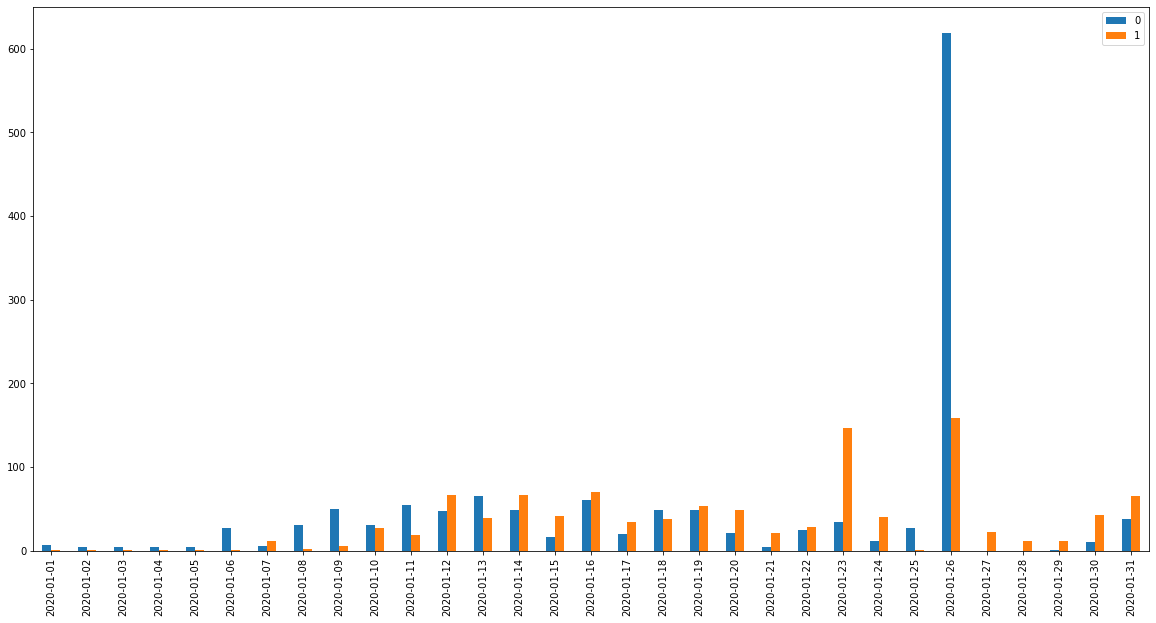

In [10]:
df_bar = pd.DataFrame(data=daily_log_count).T
df_bar.index.astype('datetime64[ns]')
df_bar.sort_index(inplace=True)
df_bar.loc['2020-01-01':'2020-01-31'].plot(kind='bar')

In [11]:
import re

def clean_content(message):

    try:
        message = message.lower()
        message = re.sub(r"\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b", 'IPADDRESS', message)
        message = re.sub(r"\b0x[0-9A-F]+\b", 'HEXCODE', message)
        message = re.sub(r"\b\d{1,3}\:\d{1,2}\:\d{1,2}\b", 'TIME', message)
        message = re.sub(r" \b\d{1,3} \b", 'NUMBER', message)
        # Removing characters apart from alphabets
        message = re.sub('([^A-Za-z ])+', ' ', message)
        # Removing words less than 3 characters
        message = re.sub(r'(\b.{1,2}\s)+', ' ', message)
    except:
        print(message)
    
    
    return message

In [12]:
df['Message'] = df['Message'].apply(clean_content)
df.sample(10)

,Date,Time,Hostname,Message,Severity,Process,PID,User,IP,Len
22203,2020-01-12,01:56:43,combo,connection from IPADDRESS afontenayssb abo wan...,0,ftpd,[17129],root,82.121.80.235,109
3499,2019-08-06,07:23:59,combo,connection from IPADDRESS sat aug NUMBERTIME,0,ftpd,[10170],root,211.107.232.1,61
1204,2019-06-22,03:17:46,combo,authentication failure logname uid euid tty no...,1,sshd(pam_unix),[16218],root,127.0.0.1,111
21681,2019-12-09,09:48:09,combo,removing device node udev vcsa,0,udev,[16093],root,127.0.0.1,34
4812,2019-09-07,04:23:29,combo,connection from IPADDRESS mail systemsevolutio...,0,ftpd,[4273],root,69.15.163.251,87
16334,2019-11-29,06:07:08,combo,out memory killed process httpd,1,kernel,0,root,127.0.0.1,43
7977,2019-11-05,06:43:16,combo,connection from IPADDRESS dslb pools arcor ne...,0,ftpd,[11348],root,84.57.172.16,99
2394,2019-07-17,06:14:36,combo,connection from IPADDRESS aml sfh adsl wanadoo...,0,ftpd,[23585],root,83.116.207.11,90
282,2019-06-09,10:07:21,combo,listening ipv interface eth IPADDRESS,0,named,[2275],root,63.126.79.125,53
10492,2019-11-21,00:21:37,combo,out memory killed process httpd,1,kernel,0,root,127.0.0.1,44


In [13]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Process'] = le.fit_transform(df['Process'])

df.sample(10)

,Date,Time,Hostname,Message,Severity,Process,PID,User,IP,Len
16022,2019-11-29,04:09:26,combo,out memory killed process httpd,1,28,0,root,127.0.0.1,43
5587,2019-09-22,22:41:34,combo,connection from IPADDRESS club internet thu...,0,17,[14495],root,212.194.100.8,99
12561,2019-11-22,09:26:08,combo,wake HEXCODE,1,28,0,root,127.0.0.1,32
14406,2019-11-24,19:50:20,combo,out memory killed process python,1,28,0,root,127.0.0.1,45
22474,2020-01-14,16:54:44,combo,check pass user unknown,0,61,[25753],root,127.0.0.1,24
10519,2019-11-21,00:31:18,combo,out memory killed process httpd,1,28,0,root,127.0.0.1,44
10329,2019-11-20,22:40:50,combo,out memory killed process httpd,1,28,0,root,127.0.0.1,44
22708,2020-01-16,12:54:14,combo,authentication failure logname uid euid tty no...,1,61,[2899],root,61.178.20.170,96
6524,2019-10-04,06:40:50,combo,check pass user unknown,0,61,[22918],root,127.0.0.1,24
21491,2019-12-08,14:10:58,combo,authentication failure logname uid euid tty no...,1,61,[11660],root,127.0.0.1,117


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from typing import List
def get_vectors(texts) -> List:
    text = [t for t in texts]
    my_tfidf_vectorizer = TfidfVectorizer()
    my_tfidf_vectorizer.fit(text)

    return my_tfidf_vectorizer.transform(text).toarray()

def get_cosign_sim(received_vectors):
    return cosine_similarity(received_vectors)

In [ ]:
vectors = get_vectors(df['Message'])
vectors

In [ ]:
vectors.shape

In [ ]:
print(vectors[0][100:300])

In [ ]:
type(vectors)

In [ ]:
# Checking the similarities amoung vectors
similarity = get_cosign_sim(vectors)
similarity

In [ ]:
# use PCA to reduce dimensionality from 6 to 2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12, 6)

pca = PCA(n_components=2)
cos_sim_pca = pca.fit_transform(similarity)
retained_variance = pca.explained_variance_ratio_
print(retained_variance)
cos_sim_pca

In [ ]:
# Plot the texts as per similarity
# n = cos_sim_pca.shape[0]
# fig, ax = plt.subplots()
# # marker_colors = df_dt['Severity'].replace([0, 1, 2],['g', 'r', 'b'])

# for i in range(n):
#     x = cos_sim_pca[i, 0]
#     y = cos_sim_pca[i, 1]
#     # ax.scatter(x, y, s=10, c=marker_colors[i])
#     ax.scatter(x, y, s=10)

# plt.show()

In [ ]:
n = cos_sim_pca.shape[0]
fig, ax = plt.subplots()
marker_colors = df_dt['Severity'].replace([0, 1, 2],['g', 'r', 'b'])

for i in range(5000, 10000):
    x = cos_sim_pca[i, 0]
    y = cos_sim_pca[i, 1]
    ax.scatter(x, y, s=10, c=marker_colors[i])

plt.show()

In [ ]:
plt.scatter(cos_sim_pca[:, 0], cos_sim_pca[:, 1], c=marker_colors.array, s=10)
plt.show()

In [ ]:
cos_sim_pca[:, 0]

In [ ]:
cos_sim_pca[:, 1]

In [ ]:
marker_colors = df_dt['Severity'].replace([0, 1, 2],['g', 'r', 'b'])


In [ ]:
marker_colors.array

In [ ]:
# use PCA to reduce dimensionality from 6 to 2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12, 6)

pca = PCA(n_components=3)
cos_sim_pca_3d = pca.fit_transform(similarity)
retained_variance = pca.explained_variance_ratio_
print(retained_variance)
cos_sim_pca_3d

In [ ]:
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (12, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cos_sim_pca_3d[:, 0], cos_sim_pca_3d[:, 1], cos_sim_pca_3d[:, 2], c=marker_colors.array, s=10)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
    
plt.show()

